In [69]:
import cx_Oracle
import os
import pandas as pd
import numpy as np
#from datetime import datetime
import matplotlib.pyplot as plt

In [70]:
LOCATION_ORACLE = r"D:\Downloads\instantclient_19_9"
os.environ["PATH"] = LOCATION_ORACLE + ";" + os.environ["PATH"]

In [71]:
conn = cx_Oracle.connect("patio/3miostk@//localhost:1521/XE")
cursor = conn.cursor()

In [72]:
df = pd.read_csv('D:\IT-магистратура МАИ\семестр_1\Python\HistoricalQuotes.csv',header = 0, delimiter = ', ')
print(df)
SQL_string = '''INSERT INTO YNDX_NASDAQ
                                   ("Date",
                                    "Close_Last",
                                    "Volume",
                                    "Open",
                                    "High",
                                    "Low")
                             VALUES
                              (:p_Date, :p_Close_Last, :p_Volume, :p_Open, :p_High, :p_Low)                            
                             '''

            Date Close/Last    Volume    Open    High     Low
0     12/24/2020     $67.65    370633  $68.18  $68.29  $67.17
1     12/23/2020     $67.69    822039  $67.73  $68.77  $67.64
2     12/22/2020     $67.11   1002761  $67.28  $67.44   $66.3
3     12/21/2020     $67.09   1789127  $67.76  $67.83  $66.73
4     12/18/2020     $69.27   1771747  $70.65  $70.79  $69.13
...          ...        ...       ...     ...     ...     ...
2410  05/31/2011     $33.45   3979702  $34.95  $35.37  $32.61
2411  05/27/2011     $34.45   2005954  $34.75     $35     $34
2412  05/26/2011     $34.77   4415791  $34.45  $35.45     $34
2413  05/25/2011        $35  11750020  $37.75   $37.9   $34.4
2414  05/24/2011     $38.84  70156130     $35  $42.01  $30.55

[2415 rows x 6 columns]


c:\users\mi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [73]:
df[['Close/Last','Open','High','Low']] = df[['Close/Last','Open','High','Low']].applymap(lambda x: x[1:])
df= df.astype({'Date': 'datetime64', 'Close/Last': float,'Open': float,'High': float,'Low': float})

In [74]:
#t1 = [tuple(x) for x in df.values]
#print(t1[0])
#cursor.executemany(SQL_string,  t1) 

In [75]:
for x in df.values:
    print(x)
    cursor.execute(SQL_string, x)
conn.commit()     #фиксация транзакции

[Timestamp('2020-12-24 00:00:00') 67.65 370633 68.18 68.29 67.17]


IntegrityError: ORA-00001: нарушено ограничение уникальности (PATIO.SYS_C007766)

In [122]:
cursor.execute('''SELECT * FROM YNDX_NASDAQ''')
result = cursor.fetchall()
df_o = pd.DataFrame(result, columns = ['Date','Close/Last', 'Volume', 'Open','High','Low'])
df_o


,Date,Close/Last,Volume,Open,High,Low
0,2017-09-06,32.10,3723054,32.34,32.76,31.75
1,2017-09-05,32.35,4757532,32.21,32.88,32.08
2,2017-09-01,32.21,7718767,30.30,32.85,30.29
3,2017-08-31,30.01,4852648,30.21,30.46,29.93
4,2017-08-30,29.85,3910855,29.63,30.08,29.31
...,...,...,...,...,...,...
2410,2014-05-27,32.73,4629751,31.85,32.75,31.67
2411,2014-05-23,32.21,6143155,31.00,32.31,30.88
2412,2014-05-22,32.10,4557433,31.62,32.24,31.50
2413,2014-05-21,31.60,3519641,30.85,31.61,30.70


In [111]:
def correct_date():
    while True:
        try:
            input_string = input()
            if '' == input_string:
                print('Введена пустая строка')
                continue        
            date = pd.to_datetime(input_string, dayfirst = True, yearfirst = False)
            
            return date
            break
        except :
            print('Дата введена некорректно')

In [78]:
#date = pd.to_datetime('12.04.12')
#print(date)
#date.strftime('%d.%m.%Y')


In [114]:
date_one = correct_date()
print('Дата 1: '+ date_one.strftime('%d.%m.%Y'))

01.01.20
Дата 1: 01.01.2020


In [115]:
date_two = correct_date()
print('Дата 2 :'+ str(date_two.strftime('%d.%m.%Y')))

01.12.17
Дата 2 :01.12.2017


In [117]:
if (date_one > date_two):
    date_one, date_two = date_two, date_one
print(date_one, date_two)

2017-12-01 00:00:00 2020-01-01 00:00:00


In [123]:
segment = df_o[(date_one < df_o['Date']) & (df_o['Date'] < date_two)]
print(segment)

          Date  Close/Last   Volume   Open   High    Low
457 2019-12-31       43.49   562094  43.18  43.62  43.17
458 2019-12-30       43.44   893431  43.93  43.97  43.08
459 2019-12-27       43.90  1265778  44.10  44.28  43.66
460 2019-12-26       43.73   748142  43.63  43.89  43.44
461 2019-12-24       43.67   451237  43.55  43.69  43.23
..         ...         ...      ...    ...    ...    ...
974 2017-12-08       32.89  1219597  33.31  33.35  32.77
975 2017-12-07       33.02  1495999  32.36  33.19  32.26
976 2017-12-06       32.62  2428118  32.22  32.95  31.94
977 2017-12-05       32.37  2795908  32.18  32.90  31.75
978 2017-12-04       32.03  3801397  32.77  32.95  31.91

[522 rows x 6 columns]


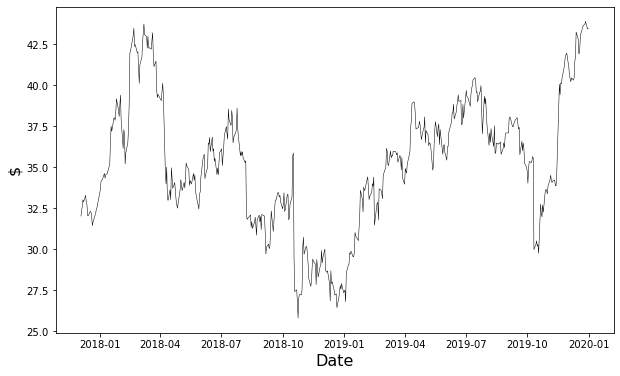

In [124]:
fig, ax = plt.subplots()

ax.plot( segment['Date'],segment['Close/Last'], color='k', linewidth = 0.5)

fig.set_figwidth(10)
fig.set_figheight(6)

plt.xlabel("Date", fontsize=16)
plt.ylabel("$", fontsize=16)
plt.show()